# Graph Mining

## 📚 Exercise 1
Complete the function `compute_modularity` to compute the modularity measure of a given graph.

### Goal:
1. Visualizing two graphs using `networkx` (the Karate Club graph is currently commented out in the code)
2. Completing `compute_modularity` function that aims to measure modularity of a given graph

### What you are learning in this exercise:
1. Getting familiar with `networkx` library.
2. Analyzing modularity measure for different graph inputs

#### Hint: you can install `networkx` package by running the following command in a  notebook cell: `!conda install networkx --yes `

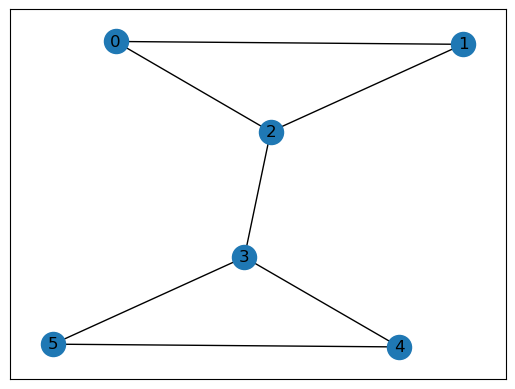

In [1]:
import networkx as nx
import numpy as np
%matplotlib inline

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw_networkx(G)

#G = nx.karate_club_graph()
#nx.draw_networkx(G)

In [2]:
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1

In [28]:
# The community label of a node can be accessed by G[node_id]['community']
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G):
    m = len(G.edges)
    Q = 0
    # your code here
    for n_i in G.nodes: 
        for n_j in G.nodes: 
            if G.nodes[n_i]['community'] == G.nodes[n_j]['community']: 
                Q += (G.number_of_edges(n_i, n_j) - G.degree(n_i) * G.degree(n_j) / (2 * m))   
    return Q/(2*m)

In [29]:
Q = compute_modularity(G)
print(Q)
print(len(G.edges()), G.size())

0.3571428571428571
7 7


## 📚 Exercise 2
Suppose that you have an undirected social graph G = (U, V), where U - set of nodes, V - set of edges.

<img src="graph.png" width="400">

Compute betweenness for the graph G and output the communities for the following betweenness threshold : 4, 6.

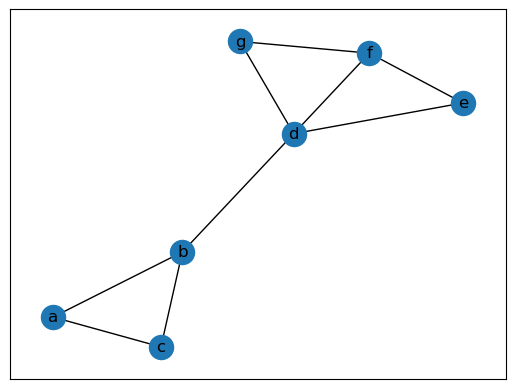

In [109]:
M = ["a,b,c",
"b,a,c,d",
"c,a,b",
"d,b,e,f,g",
"e,d,f",
"f,d,e,g",
"g,d,f"
]

G=nx.parse_adjlist(M, nodetype=str, delimiter=",")
nx.draw_networkx(G)

In [110]:
from collections import Counter
import networkx as netx

def compute_betweenness(G):

    betweenness_scores = {key : 0 for key in G.edges}

    for nx in G.nodes: 
        for ny in G.nodes: 
            paths = netx.all_shortest_paths(G,nx,ny)
            edges_per_path = [list(zip(path, path[1:])) for path in paths]
            counter = Counter([edge for path in edges_per_path for edge in path])  # list comprehension to remove the nested list

            for edge in counter: 
                if edge in betweenness_scores:  # keys are in alphabetical order
                    betweenness_scores[edge] += 1 / counter[edge]
                else: 
                    betweenness_scores[(edge[1], edge[0])] += 1 / counter[edge]

    for edge in betweenness_scores: # we count everything twice in the double for loop 
        betweenness_scores[edge] = betweenness_scores[edge] / 2

    return betweenness_scores

In [111]:
betweenness = compute_betweenness(G)
print(betweenness)

{('a', 'b'): 5.0, ('a', 'c'): 1.0, ('b', 'c'): 5.0, ('b', 'd'): 12.0, ('d', 'e'): 5.0, ('d', 'f'): 4.0, ('d', 'g'): 5.0, ('e', 'f'): 2.0, ('f', 'g'): 2.0}


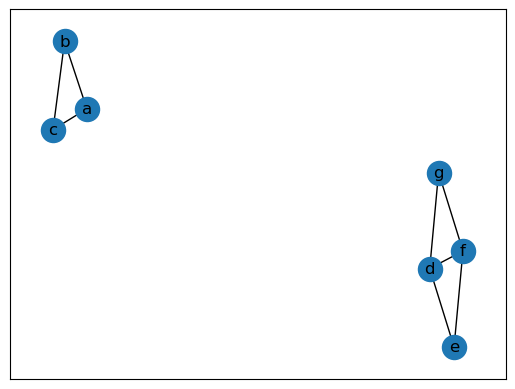

In [112]:
def remove_thresh(G, thresh): 
    for edge, betweenness_score in betweenness.items():
        if betweenness_score >= thresh and edge in G.edges: 
            G.remove_edge(edge[0], edge[1])

remove_thresh(G, 6)
netx.draw_networkx(G)

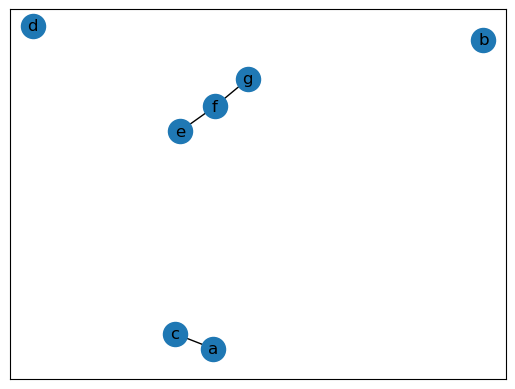

In [113]:
remove_thresh(G, 4)
netx.draw_networkx(G)